[![API](https://img.shields.io/badge/API-blue?style=flat-square&logo=python&logoColor=white) ](/api/#gmspy.SeismoGM)

<div class="admonition info">
     <p class="admonition-title">SeismoGM 🔥</p>
     <p>
         Solving intensity measures (IMs), response spectra, etc.
     </p>
</div>

See the following two references for details on ``intensity measures`` of ground motion:

* [1] Hariri-Ardebili M A, Saouma V E. Probabilistic seismic demand model and optimal intensity measure for concrete dams[J]. Structural Safety, 2016, 59: 67-85.  DOI: https://doi.org/10.1016/j.strusafe.2015.12.001
* [2] Yan Y, Xia Y, Yang J, et al. Optimal selection of scalar and vector-valued seismic intensity measures based on Gaussian Process Regression[J]. Soil Dynamics and Earthquake Engineering, 2022, 152: 106961. DOI: https://doi.org/10.1016/j.soildyn.2021.106961

In [1]:
import gmspy as gm
import matplotlib.pyplot as plt
import numpy as np

Below is the ground motion data built into gmspy, you can also document the PEER database through [loadPEER](/api/#gmspy.loadPEER), or you can read the data from text using [numpy.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html).

In [2]:
ts, acc = gm.load_gm_examples("Kobe")
dt = ts[1] - ts[0]
# You can also use other acc data

Instantiate the class where the arg ``unit`` is used to tell the program which unit your acceleration record is in.

Default: acc:g, vel=cm, disp=cm.

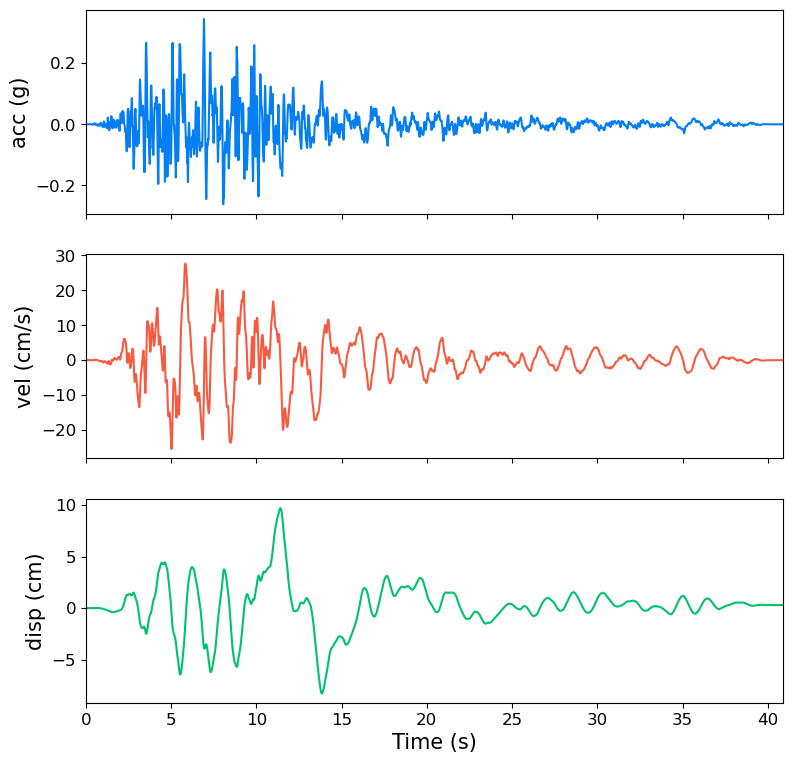

In [3]:
GM = gm.SeismoGM(dt=dt, acc=acc, unit="g")
GM.plot_hist()
plt.show()

You can also reset the units

<div class="admonition note">
     <p class="admonition-title">Note</p>
     <p>
         This will change the units of all time-histories, including acceleration. Subsequent IMs are computed in the latest units.
     </p>
</div>

acc-unit: m/s2;
vel-unit；m/s;
disp-unit: m

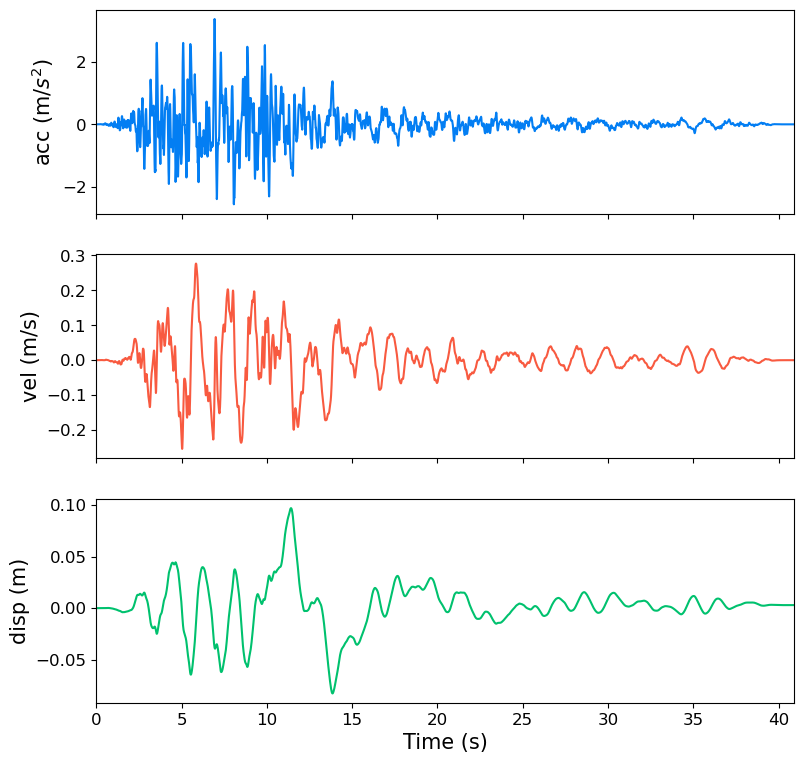

In [4]:
GM.set_units(acc="m", vel="m", disp="m")
GM.plot_hist()
plt.show()

## Get IMs independent of response spectra 💫

[![API](https://img.shields.io/badge/API-blue?style=flat-square&logo=python&logoColor=white) ](/api/#gmspy.SeismoGM.get_ims)

In [5]:
ims = GM.get_ims(display_results=True)

┏━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ IM        ┃  Value  ┃         Unit         ┃                                           Name ┃
┡━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ PGA       │  3.382  │         m/s2         │                       Peak ground acceleration │
│ PGV       │  0.277  │         m/s          │                           Peak ground velocity │
│ PGD       │  0.097  │          m           │                       Peak ground displacement │
│ V_A       │  0.082  │          s           │                                        PGV/PGA │
│ D_V       │  0.350  │          s           │                                        PGD/PGV │
│ EDA       │  3.215  │         m/s2         │                  Effective Design Acceleration │
│ Ia        │  1.687  │         m/s          │                                Arias Intensity │
│ Ima       │  0.028  │         m/s          │                       Modified Arias Intensity │
│ MIV       │  0.433  │         m/s          │                   Maximum Incremental Velocity │
│ Arms      │  0.508  │         m/s2         │               Root-mean-square of acceleration │
│ Vrms      │  0.063  │         m/s          │                   Root-mean-square of velocity │
│ Drms      │  0.023  │          m           │               Root-mean-square of displacement │
│ Pa        │  0.737  │       (m/s2)^2       │ Housner earthquake power index of acceleration │
│ Pv        │  0.011  │       (m/s)^2        │     Housner earthquake power index of velocity │
│ Pd        │  0.001  │        (m)^2         │ Housner earthquake power index of displacement │
│ Ra        │  7.922  │     m/s2*s^(1/3)     │                  Riddell index of acceleration │
│ Rv        │  0.995  │ (m/s)^(2/3)*s^(1/3)  │                      Riddell index of velocity │
│ Rd        │  0.227  │      m*s^(1/3)       │                  Riddell index of displacement │
│ SED       │  0.163  │         m2/s         │                        Specific Energy Density │
│ If        │  0.524  │    (m/s)*s^(1/4)     │                                   Fajfar index │
│ Ic        │  2.313  │ (m/s2)^(2/3)*s^(1/2) │                       Characteristic Intensity │
│ Icm       │ 11.260  │          --          │                     Cosenza–Manfredi Intensity │
│ CAV       │ 11.614  │         m/s          │                   Cumulative Absolute Velocity │
│ CAD       │  1.622  │          m           │               Cumulative Absolute Displacement │
│ CAI       │  0.597  │         m*s          │                    Cumulative Absolute Impetus │
│ CAVstd    │  1.105  │         g*s          │       tandardized Cumulative Absolute Velocity │
│ Ip        │ 161.544 │          --          │                              Impulsivity Index │
│ Tsig_5_95 │ 12.860  │          s           │                5%-95% Arias intensity duration │
│ Tsig_5_75 │  6.510  │          s           │                5%-75% Arias intensity duration │
│ Tbd       │ 34.410  │          s           │                             Bracketed duration │
│ Tud       │ 16.435  │          s           │                               Uniform duration │
└───────────┴─────────┴──────────────────────┴────────────────────────────────────────────────┘

In [6]:
for item in ims.items():
    print(item[0], ":", float(item[1]))

PGA : 3.381507
PGV : 0.27677933999999954
PGD : 0.09693236474998851
V_A : 0.08185088482738599
D_V : 0.3502153186360972
EDA : 3.21549666180272
Ia : 1.6874397912773698
Ima : 0.0279068117705535
MIV : 0.43312048806766457
Arms : 0.5076063591023476
Vrms : 0.06305087790947873
Drms : 0.02294746598091172
Pa : 0.7366588880733256
Pv : 0.011174889730021969
Pd : 0.0014749912617643029
Ra : 7.922409381417102
Rv : 0.9950298341209709
Rd : 0.22709930095021344
SED : 0.16259440009088008
If : 0.5241359052893505
Ic : 2.3128753907548854
Icm : 11.259872065686206
CAV : 11.613676410000007
CAD : 1.6223236487999961
CAI : 0.5973670751104103
CAVstd : 1.1048120000000008
Ip : 161.54431975452306
Tsig_5_95 : 12.860000000000001
Tsig_5_75 : 6.510000000000001
Tbd : 34.410000000000004
Tud : 16.434799105297873


## Elastic response spectra, PSa, PSv, Sa, Sv, Sd 💫

[![API](https://img.shields.io/badge/API-blue?style=flat-square&logo=python&logoColor=white) ](/api/#gmspy.SeismoGM.get_elas_spec)

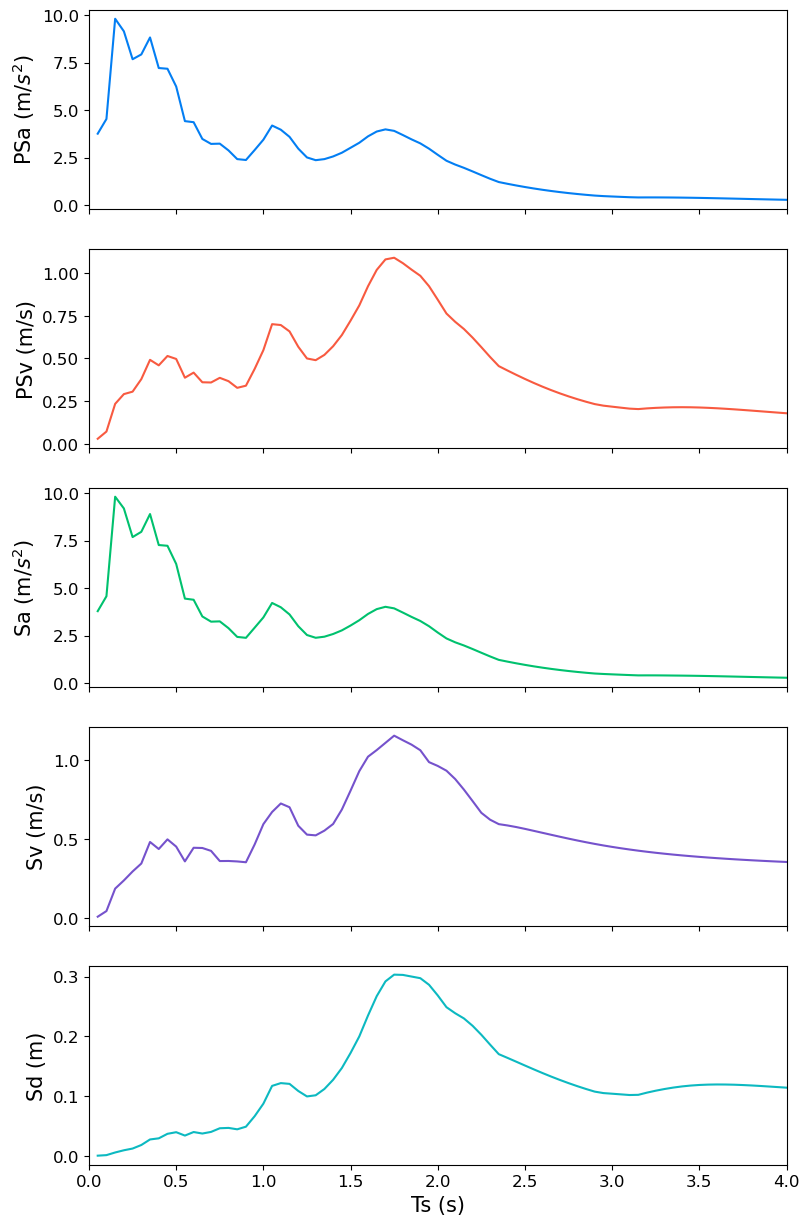

In [7]:
Ts = np.arange(0.05, 4.05, 0.05)
spectra = GM.get_elas_spec(Ts=Ts, damp_ratio=0.05, plot=True)
# PSa, PSv, Sa, Sv, Sd for each column

In [8]:
# PSa, PSv, Sa, Sv, Sd for each column
PSa = spectra[:, 0]

## Fourier magnitude and power spectra 

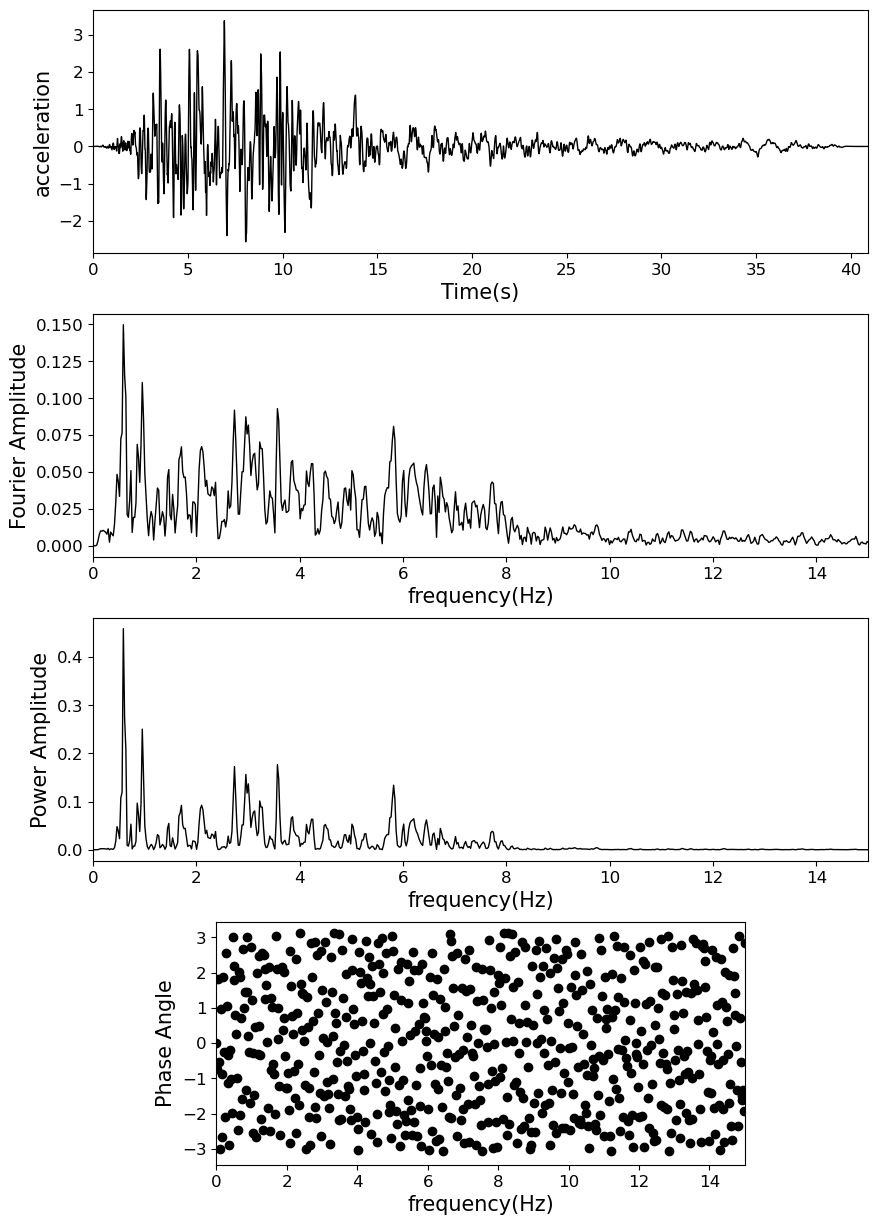

In [9]:
output = GM.get_fou_pow_spec(plot=True)

## Constant ductility response spectra 💫

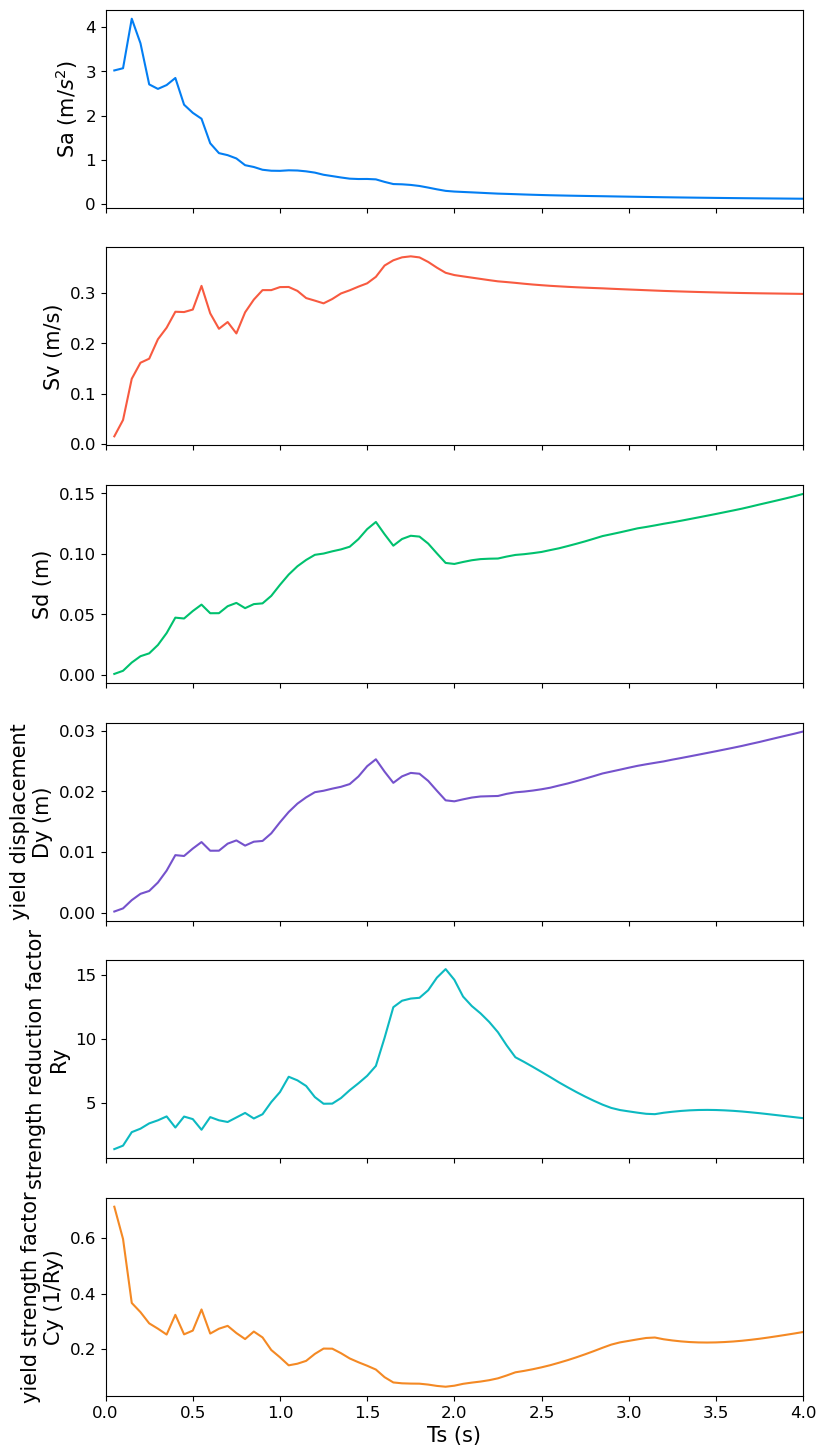

In [10]:
output = GM.get_const_duct_spec(
    Ts=Ts, harden_ratio=0.02, damp_ratio=0.05, mu=5, plot=True
)

## Other Response Spectra Related IMs 💫

### Spectral values at the first period of the structure

[![API](https://img.shields.io/badge/API-blue?style=flat-square&logo=python&logoColor=white) ](/api/#gmspy.SeismoGM.get_elas_spec)


In [11]:
T1 = [0.5, 1.0, 1.5]
# T1 = 1.0
GM.get_elas_spec(Ts=T1)
# PSa, PSv, Sa, Sv, Sd for each column

array([[6.2446254 , 0.4969315 , 6.26848805, 0.45315137, 0.03954455],
       [3.44636745, 0.54850641, 3.45859766, 0.59502918, 0.08729751],
       [3.02081908, 0.72116743, 3.03136244, 0.80644359, 0.17216604]])

### Cordova Intensity

In [12]:
GM.get_sac(T1=1.0)

3.035029886358563

### Vamvatsikos Intensity

In [13]:
GM.get_savam(T1=1, T2=0.75, T3=2)

3.105224869186609

### Multiple-Period Intensity

In [14]:
GM.get_samp(T1=1, T2=0.75, m1=0.2, m2=0.1)

3.3878000513594224

### Average Spectral Acceleration, Velocity and Displacement

In [15]:
Tavg = np.arange(0.05, 4.05, 0.05)
GM.get_avgsavd(Tavg=Tavg)
# acceleration, velocity and displacement

array([1.52834295, 0.48102258, 0.0898247 ])

### The peak of the response spectra

In [16]:
GM.get_savdp()
# acceleration, velocity and displacement

array([11.35077016,  1.15404101,  0.3043977 ])

### Acceleration (ASI)，Velocity (VSI) and Displacement(DSI) Spectrum Intensity

In [17]:
GM.get_avdsi()
# acceleration, velocity and displacement

array([3.09737311, 1.52456845, 0.17287519])

### Housner Spectra Intensity (HSI)

In [18]:
GM.get_hsi()

0.5869311558537018

### Effective peak acceleration (EPA), velocity (EPV) and displacement (EPD)

In [19]:
GM.get_epavd()

array([3.05773882, 0.29902056, 0.04619255])